#Alzheimer’s MRI Disease Classification
What is Alzheimer’s Disease?
Alzheimer’s is a progressive brain disorder that causes memory loss, confusion, and difficulty in thinking. It is the leading cause of dementia, affecting millions worldwide. Over time, it worsens, making daily life challenging.

Why is Early Detection Important?
Slows Disease Progression: Early diagnosis allows better symptom management.
Better Planning: Helps patients and families prepare for the future.
Access to Clinical Trials: Increases chances of trying new treatments.
Reduces Healthcare Costs: Early intervention lowers medical expenses.

 How Can AI Help?
Using MRI scans and Deep Learning (CNNs), we can automate Alzheimer’s detection, making diagnosis faster and more accurate.

Goal: Build a CNN model to classify MRI scans into different stages of Alzheimer’s disease.

 Dataset Overview
This dataset contains MRI scans for classifying different stages of Alzheimer’s disease. The images are stored in Parquet format, where each row represents an image in a byte-encoded format.

Dataset Contents
MRI Images: Brain scans converted to NumPy arrays.
Labels: Four categories indicating the stage of Alzheimer’s.
Train & Test Split: Predefined train and test datasets.

Class Labels
Each MRI scan is classified into one of four categories:

#Label	Class Name	Description
0	Mild Demented	Early signs of dementia.
1	Moderate Demented	Noticeable memory loss and confusion.
2	Non Demented	Healthy brain, no signs of Alzheimer’s.
3	Very Mild Demented	Minimal symptoms, slight cognitive decline.
This structured dataset helps in training a Deep Learning model (CNN) to classify MRI scans accurately.

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [14]:
import tensorflow as tf
import pandas as pd

# Read the training Parquet file using pandas
train_df = pd.read_parquet("/content/train-00000-of-00001-c08a401c53fe5312.parquet")

# Read the test Parquet file using pandas
test_df = pd.read_parquet("/content/test-00000-of-00001-44110b9df98c5585.parquet")

# Preview one record from each
print("Train record example:")
print(train_df.head(1))  # Display the first row of the DataFrame

print("\nTest record example:")
print(test_df.head(1))  # Display the first row of the DataFrame


Train record example:
                                               image  label
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      2

Test record example:
                                               image  label
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      3


In [15]:
train_df.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2


In [16]:
test_df.head()

,image,label
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,2
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,3
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,0


#Data Preprocessing
The dataset stores MRI scan images in Parquet format, where images are saved as byte strings inside a dictionary. Since deep learning models require numerical image arrays, we need to convert these byte-encoded images into usable grayscale images.

How It Works?
Extracts the byte string from the dictionary.
Converts bytes into a NumPy array (np.frombuffer).
Decodes it into an image using cv2.imdecode(), ensuring it’s in grayscale mode.
If the input is not a valid dictionary, it raises an error.

In [17]:
import cv2
def dict_to_image(image_dict):
    if isinstance(image_dict, dict) and 'bytes' in image_dict:
        byte_string = image_dict['bytes']
        nparr = np.frombuffer(byte_string, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)
        return img
    else:
        raise TypeError(f"Expected dictionary with 'bytes' key, got {type(image_dict)}")

In [18]:
#We can apply this function to transform all images in the dataset
train_df['img_arr'] = train_df['image'].apply(dict_to_image)
train_df.drop("image", axis=1, inplace=True)
train_df.head()

,label,img_arr
0,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [19]:
# Create a dictionary to map labels to class names
label_mapping = {
    0: "Mild_Demented",
    1: "Moderate_Demented",
    2: "Non_Demented",
    3: "Very_Mild_Demented"
}


train_df['class_name'] = train_df['label'].map(label_mapping)


train_df.head()

,label,img_arr,class_name
0,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Non_Demented
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Mild_Demented
2,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Very_Mild_Demented
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Very_Mild_Demented
4,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Non_Demented


#Explore data

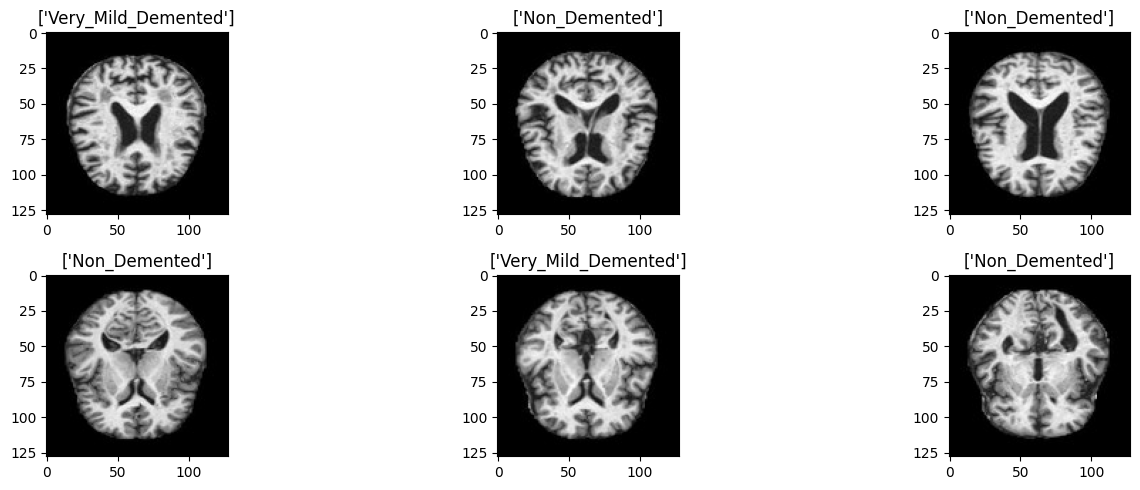

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
axs = ax.flatten()
for axes in axs:
    rand = np.random.randint(0, len(train_df))
    axes.imshow(train_df.iloc[rand]['img_arr'], cmap="gray")
    axes.set_title([train_df.iloc[rand]['class_name']])
plt.tight_layout()
plt.show()

<ipython-input-22-c264ac7885aa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='class_name', palette="viridis")


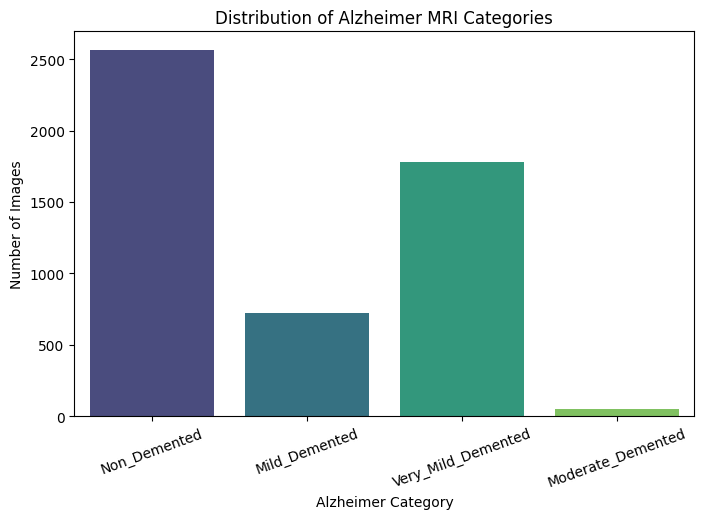

In [22]:

import seaborn as sns



plt.figure(figsize=(8, 5))

# Countplot to visualize the distribution of classes
sns.countplot(data=train_df, x='class_name', palette="viridis")

# Add labels and title
plt.xlabel("Alzheimer Category")
plt.ylabel("Number of Images")
plt.title("Distribution of Alzheimer MRI Categories")
plt.xticks(rotation=20)


plt.show()

In [23]:
train_df['class_name'].value_counts()

,count
class_name,
Non_Demented,2566
Very_Mild_Demented,1781
Mild_Demented,724
Moderate_Demented,49


**dataset is imbalanced because non_demented and ver_mild_demented dominate the dataset while moderate_demented is extremly low**

In [24]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['class_name'], random_state=42)

In [25]:
train_df.shape,val_df.shape

((4096, 3), (1024, 3))

**Normalize images: When working with image data, pixel values typically range from 0 to 255 (since images are stored as 8-bit integers). Normalizing them by dividing by 255 scales these values between 0 and 1.**

In [26]:
train_df['img_arr'] = train_df['img_arr'].apply(lambda x: x / 255.0)
val_df['img_arr'] = val_df['img_arr'].apply(lambda x: x / 255.0)
print("Training Set Class Distribution:\n", train_df['class_name'].value_counts())
print("\nValidation Set Class Distribution:\n", val_df['class_name'].value_counts())

Training Set Class Distribution:
 class_name
Non_Demented          2053
Very_Mild_Demented    1425
Mild_Demented          579
Moderate_Demented       39
Name: count, dtype: int64

Validation Set Class Distribution:
 class_name
Non_Demented          513
Very_Mild_Demented    356
Mild_Demented         145
Moderate_Demented      10
Name: count, dtype: int64



#Model Building
**Baseline model with CNN**

In [27]:

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


X_train = np.stack(train_df['img_arr'].values)  # Convert to NumPy array
y_train = train_df['label'].values

X_val = np.stack(val_df['img_arr'].values)
y_val = val_df['label'].values

# Reshape X (assuming grayscale images of size 128x128)
X_train = X_train.reshape(-1, 128, 128, 1)  # (Samples, Height, Width, Channels)
X_val = X_val.reshape(-1, 128, 128, 1)

In [28]:
#  CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Train model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 111s 852ms/step - accuracy: 0.4672 - loss: 1.1865 - val_accuracy: 0.5889 - val_loss: 0.9505
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 118s 926ms/step - accuracy: 0.5879 - loss: 0.8881 - val_accuracy: 0.6484 - val_loss: 0.8086
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 149s 982ms/step - accuracy: 0.7252 - loss: 0.6615 - val_accuracy: 0.7998 - val_loss: 0.4892
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 121s 821ms/step - accuracy: 0.8784 - loss: 0.3370 - val_accuracy: 0.8135 - val_loss: 0.4077
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 136s 773ms/step - accuracy: 0.9383 - loss: 0.1796 - val_accuracy: 0.9141 - val_loss: 0.2397
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 137s 731ms/step - accuracy: 0.9828 - loss: 0.0718 - val_accuracy: 0.9111 - val_loss: 0.2683
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 146s 765ms/step - accuracy: 0.9974 - loss: 0.0270 - val_accuracy: 0.9609 - val_loss: 0.1635
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 95s 739ms/step - accuracy: 0.9965 - 

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,176,782 (84.60 MB)

 Trainable params: 7,392,260 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,784,522 (56.40 MB)

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       145
           1       1.00      1.00      1.00        10
           2       0.97      0.97      0.97       513
           3       0.96      0.97      0.97       356

    accuracy                           0.97      1024
   macro avg       0.98      0.97      0.98      1024
weighted avg       0.97      0.97      0.97      1024



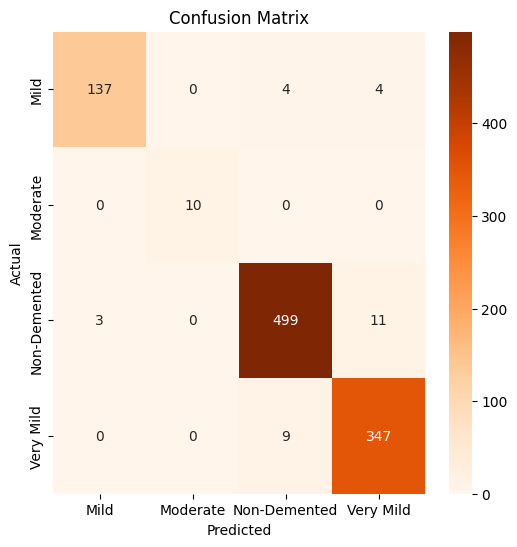

In [38]:
# Evaluate Model
y_pred = np.argmax(model.predict(X_val), axis=1)
print(classification_report(y_val, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Mild', 'Moderate', 'Non-Demented', 'Very Mild'],
            yticklabels=['Mild', 'Moderate', 'Non-Demented', 'Very Mild'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<ipython-input-40-1f3622257d86>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m^-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'm^-', color='orange', label='Validation Loss')  # orange triangles


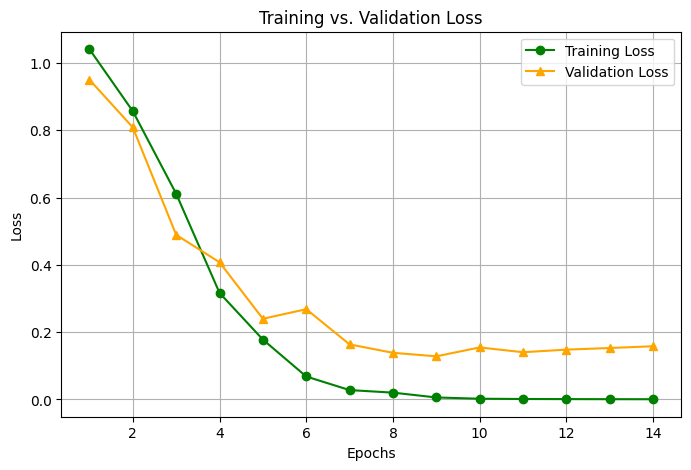

In [40]:
import matplotlib.pyplot as plt

# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'go-', label='Training Loss')   # 'go-' = green circles with a solid line
plt.plot(epochs, val_loss, 'm^-', color='orange', label='Validation Loss')  # orange triangles
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid()
plt.show()


#Prediction on Test Data

In [33]:
test_df['img_arr'] = test_df['image'].apply(dict_to_image)
test_df.drop("image", axis=1, inplace=True)

In [34]:
test_df

,label,img_arr
0,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...
1275,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1276,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1277,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1278,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [35]:
X_test = np.stack(test_df['img_arr'].values)  # Convert list of arrays to numpy array
y_test = test_df['label'].values  # Extract labels

X_test = X_test.reshape(-1, 128, 128, 1)  # Reshape for CNN

X_test = X_test / 255.0

y_pred_prob = model.predict(X_test)  # Get probability scores
y_pred = np.argmax(y_pred_prob, axis=1)  # Get predicted class

40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step


In [36]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9594
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95       172
           1       1.00      0.93      0.97        15
           2       0.97      0.96      0.97       634
           3       0.94      0.97      0.95       459

    accuracy                           0.96      1280
   macro avg       0.97      0.95      0.96      1280
weighted avg       0.96      0.96      0.96      1280



In [44]:
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 95.94%
